In [160]:
# To suppress all the warnings
import warnings
warnings.filterwarnings("ignore")

In [161]:
# import pandas to create a dataframe containing the dataset
import pandas as pd

In [162]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [163]:
# showing the first 5 rows
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [164]:
# using info() to know the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [165]:
# using describe() to have an overview of the numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [166]:
# drop 'customerID' because it has unique values
df.drop(columns=['customerID'],axis=1,inplace=True)

In [167]:
# to make sure that there are no duplicated rows
df.duplicated().sum()

22

In [168]:
# drop the duplicated rows
df.drop_duplicates(inplace=True)

In [169]:
df.duplicated().sum()

0

In [170]:
#checking the missing values
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [171]:
df.shape

(7021, 20)

In [172]:
'''
some notes about our results
1) before removing the duplicated rows, we 7043 rows. After removing the duplicated rows, we 7021 rows
2) 20 columns excluding "customerID"
3) 4 numerical columns
4) 16 categorical columns
5) there are no null values
'''

'\nsome notes about our results\n1) before removing the duplicated rows, we 7043 rows. After removing the duplicated rows, we 7021 rows\n2) 20 columns excluding "customerID"\n3) 4 numerical columns\n4) 16 categorical columns\n5) there are no null values\n'

In [173]:
# lets draw histograms with KDE for the numerical columns to know how they are distributed
# split categorical and numarical
# before doing that i will fix the "TotalCharges" column
# Convert the column to numeric, coercing errors to NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
# I won't fill the null values now to avoid data leakage

In [174]:
df_numerical_features = df.select_dtypes(include='number')
df_numerical_features.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [175]:
df_categorical_features = df.select_dtypes(include='object')
df_categorical_features.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

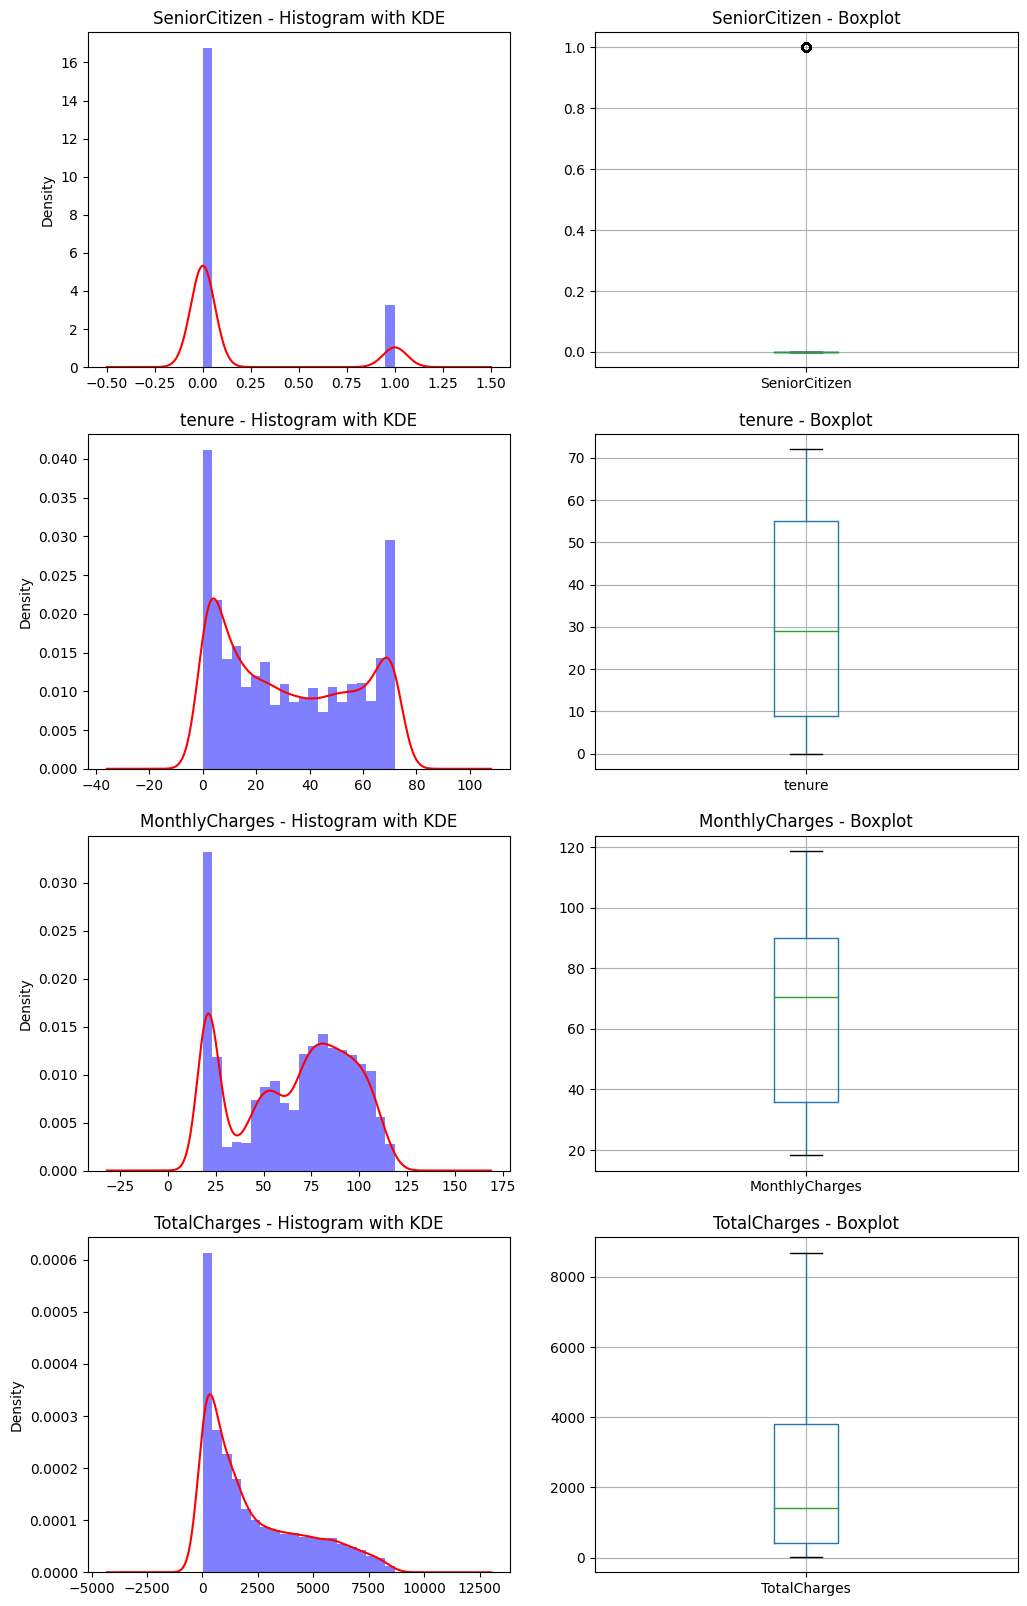

In [176]:
# now, the data is ready to be used to draw the histograms
import numpy as np
import matplotlib.pyplot as plt

# Sample data creation
np.random.seed(0)

# Plotting Histogram with KDE and Boxplot for each numerical feature
fig, axes = plt.subplots(len(df_numerical_features.columns), 2, figsize=(12, 5 * len(df_numerical_features.columns)))

for i, col in enumerate(df_numerical_features.columns):
    # Histogram with KDE
    df_numerical_features[col].plot(kind='hist', density=True, ax=axes[i, 0], bins=20, alpha=0.5, color='blue')
    df_numerical_features[col].plot(kind='kde', ax=axes[i, 0], color='red')
    axes[i, 0].set_title(f'{col} - Histogram with KDE')

    # We can add Boxplot to be more clear
    # Boxplot
    df_numerical_features.boxplot(column=col, ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} - Boxplot')

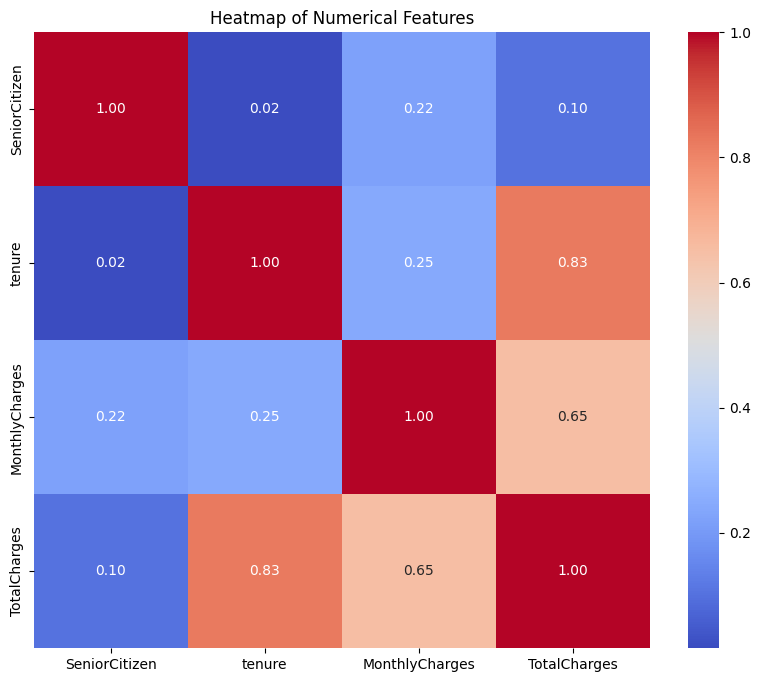

In [177]:
# draw a heatmap to know if there is correltaion between the columns
import seaborn as sns
corr = df_numerical_features.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Heatmap of Numerical Features')
plt.show()

In [178]:
# as we can see "tenure" and "TotalCharges" are highly correalated
# usually we have tell an expert to know if we should keep them or just drop one of them. But I will keep both of for now

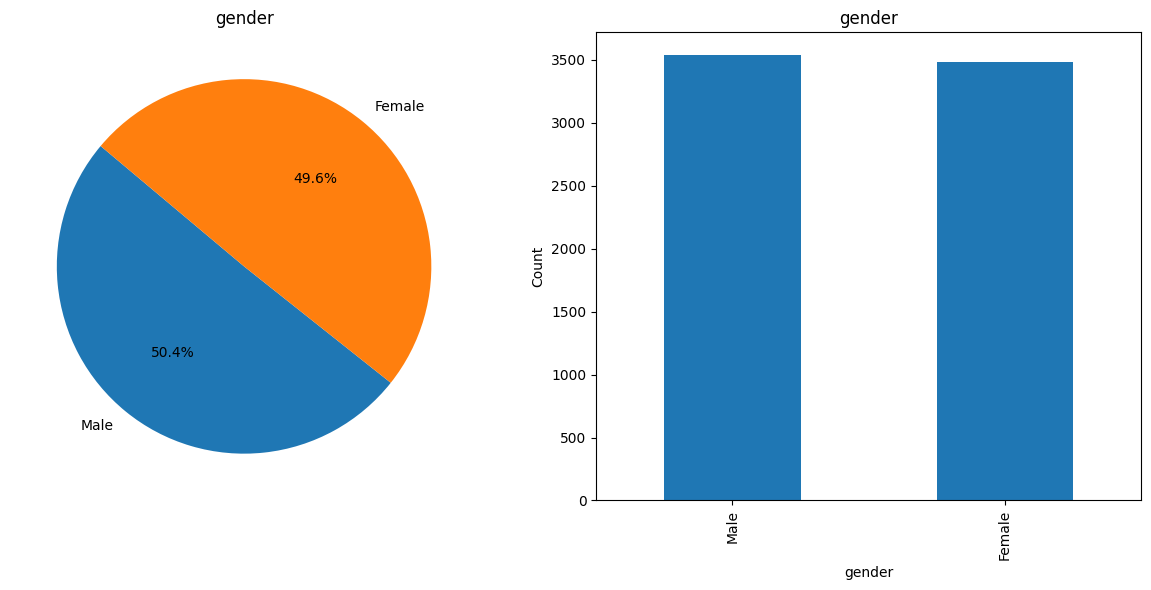

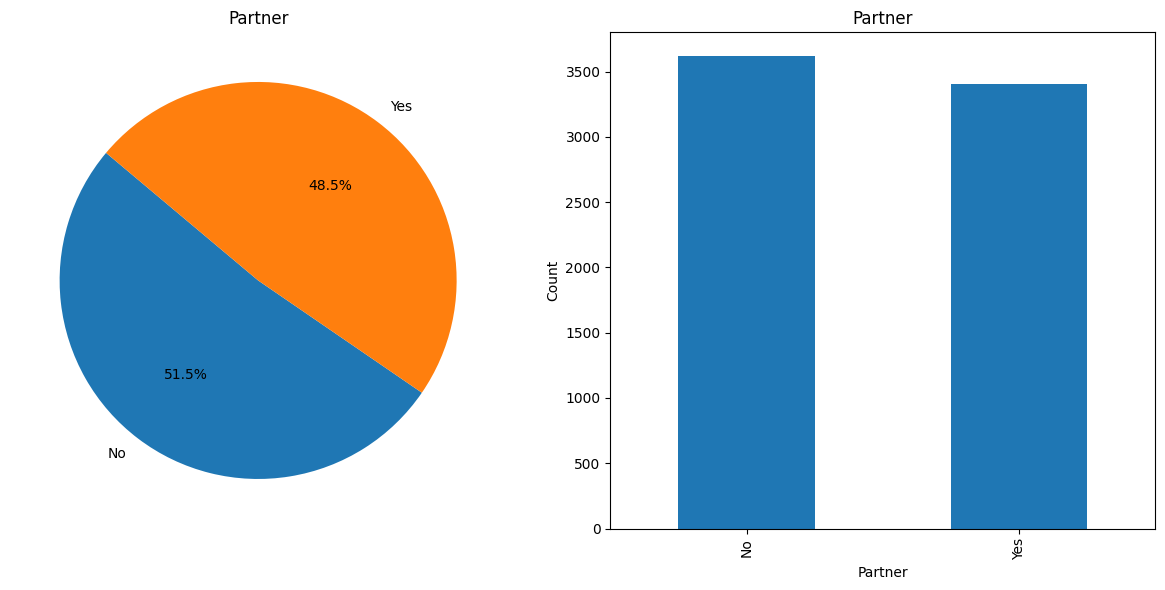

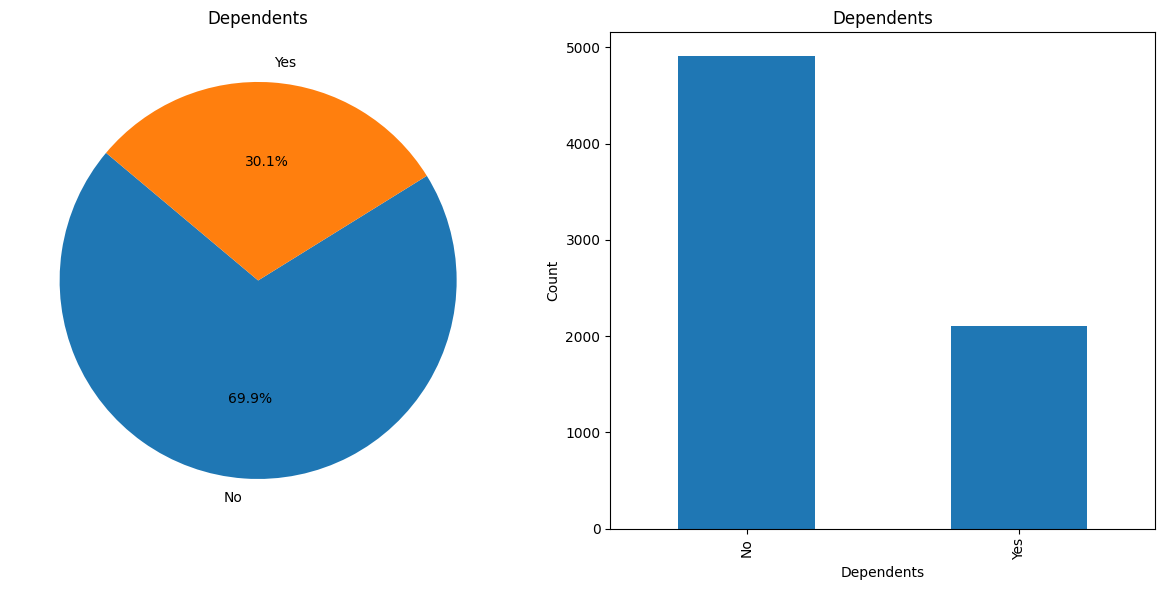

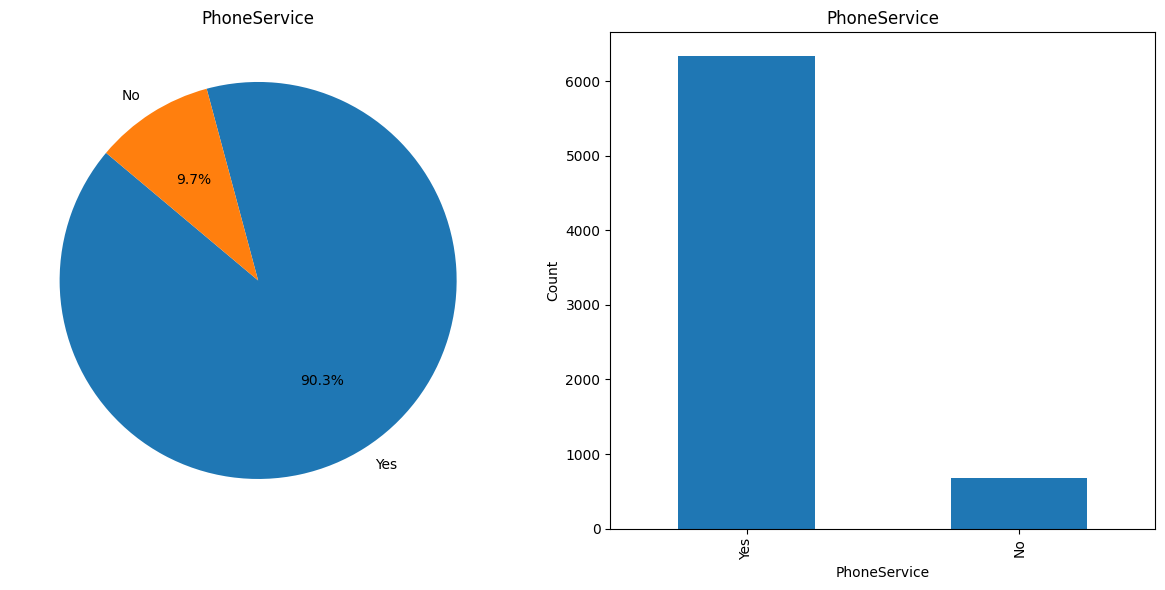

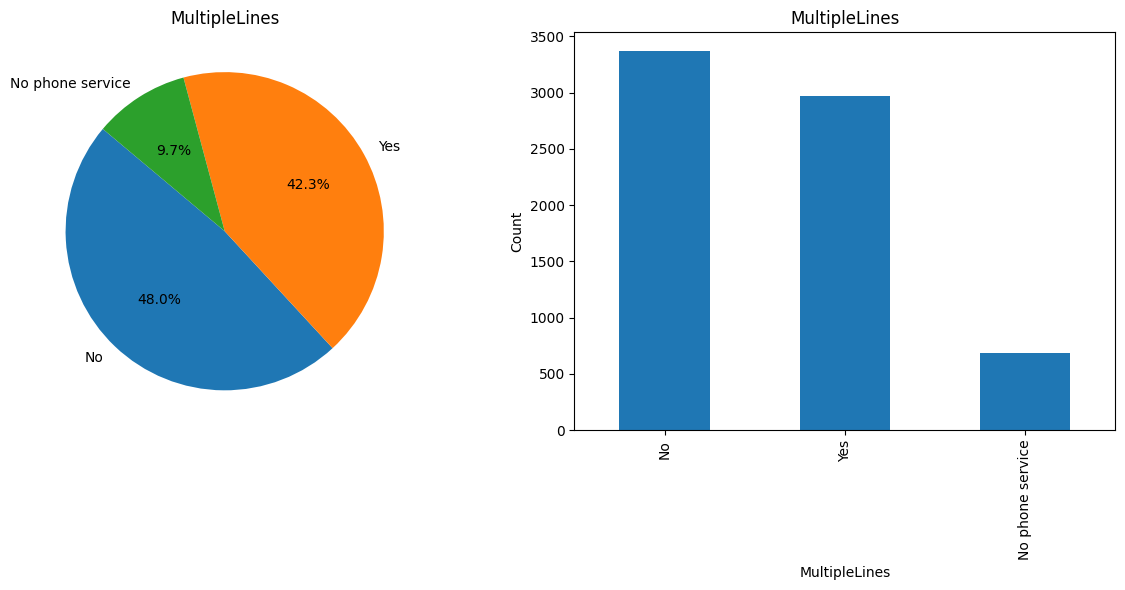

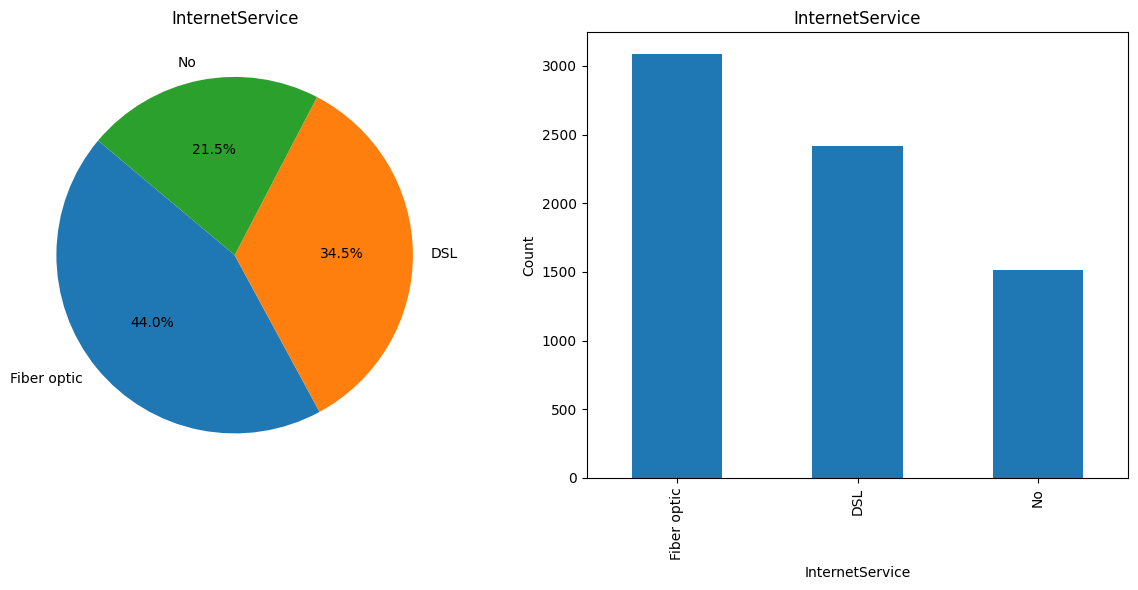

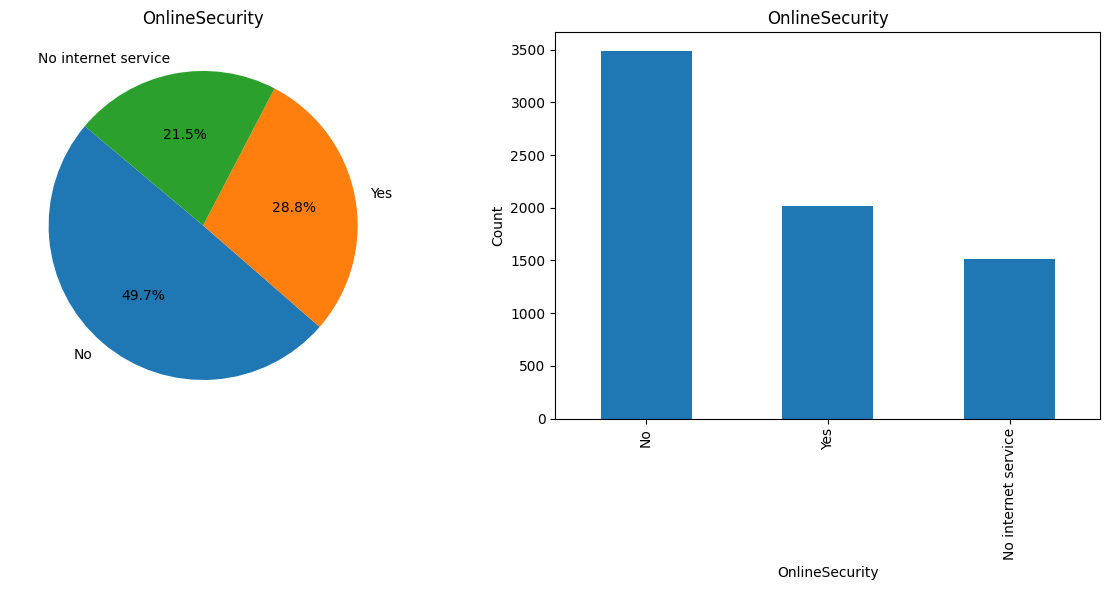

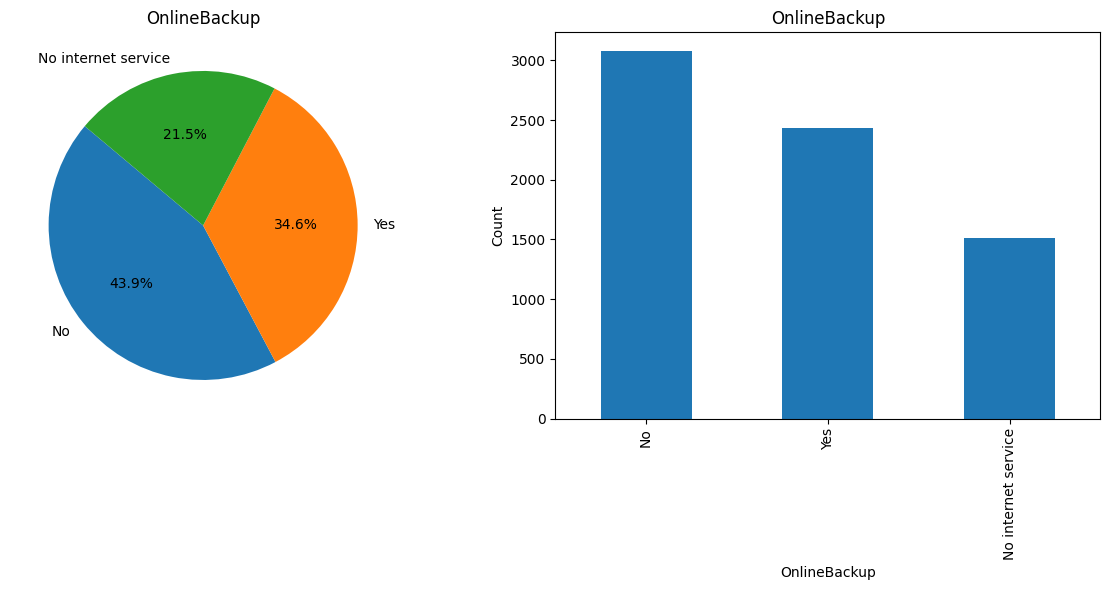

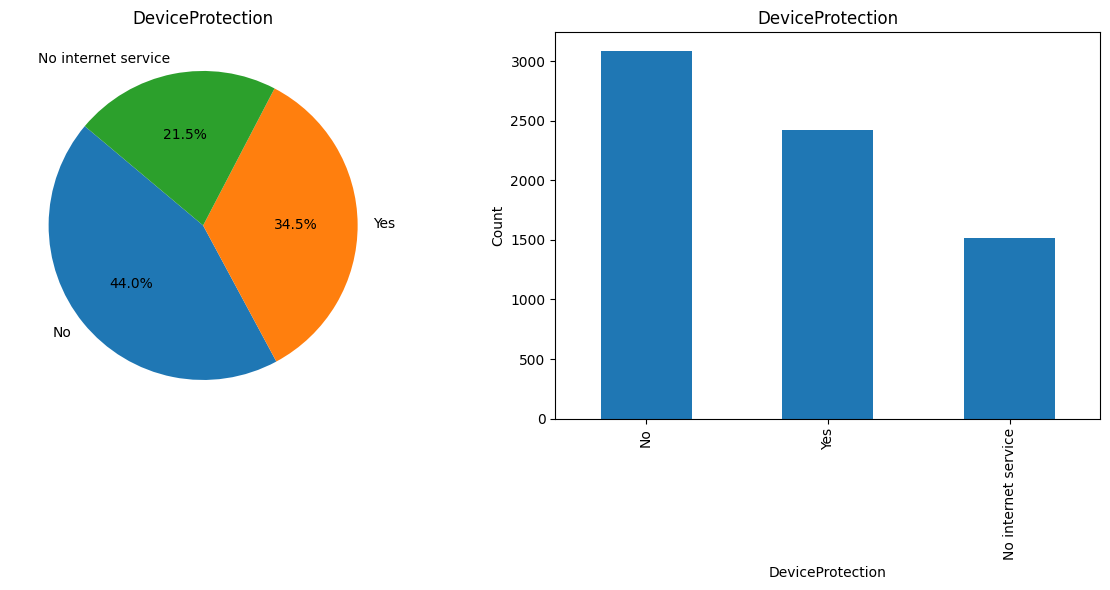

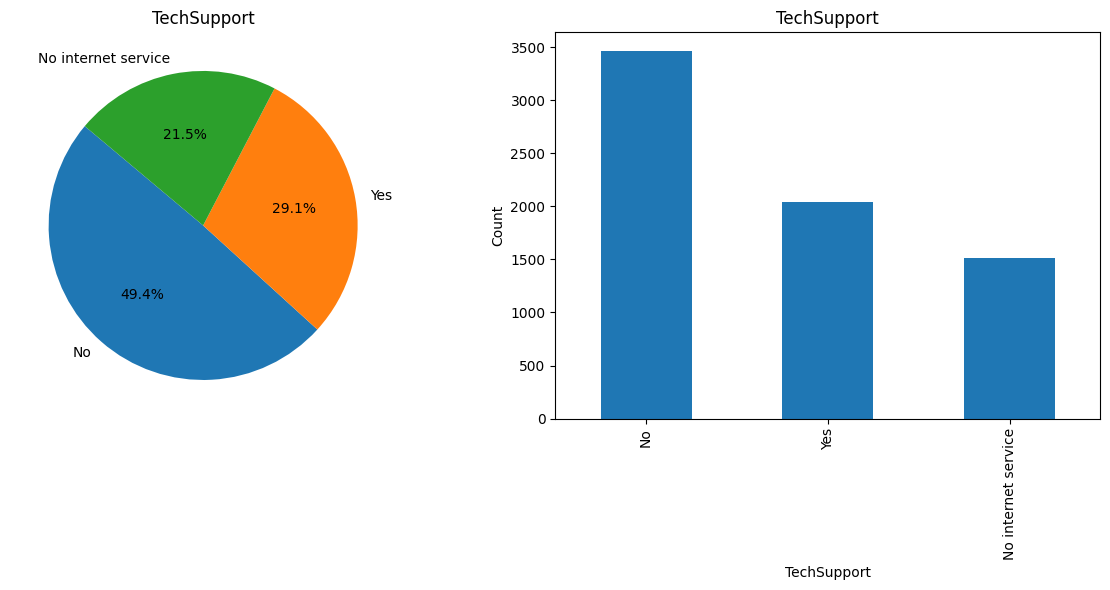

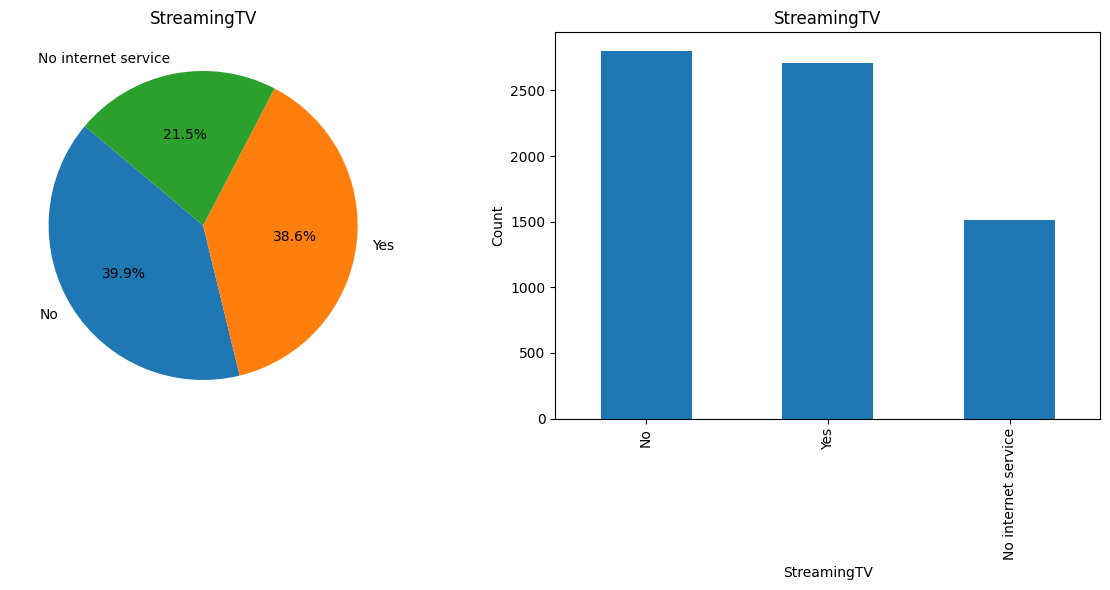

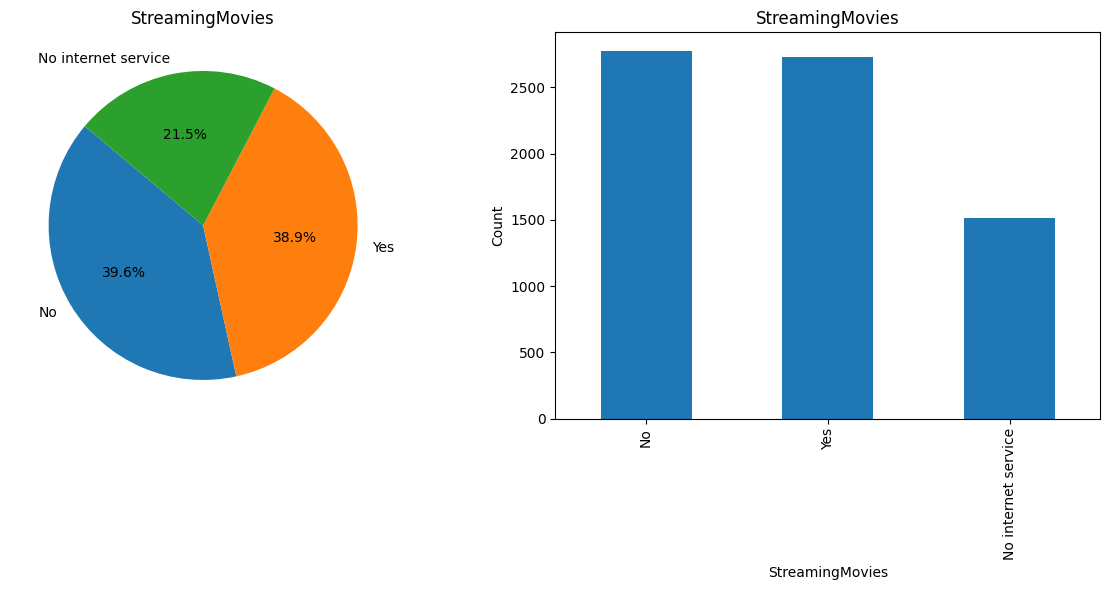

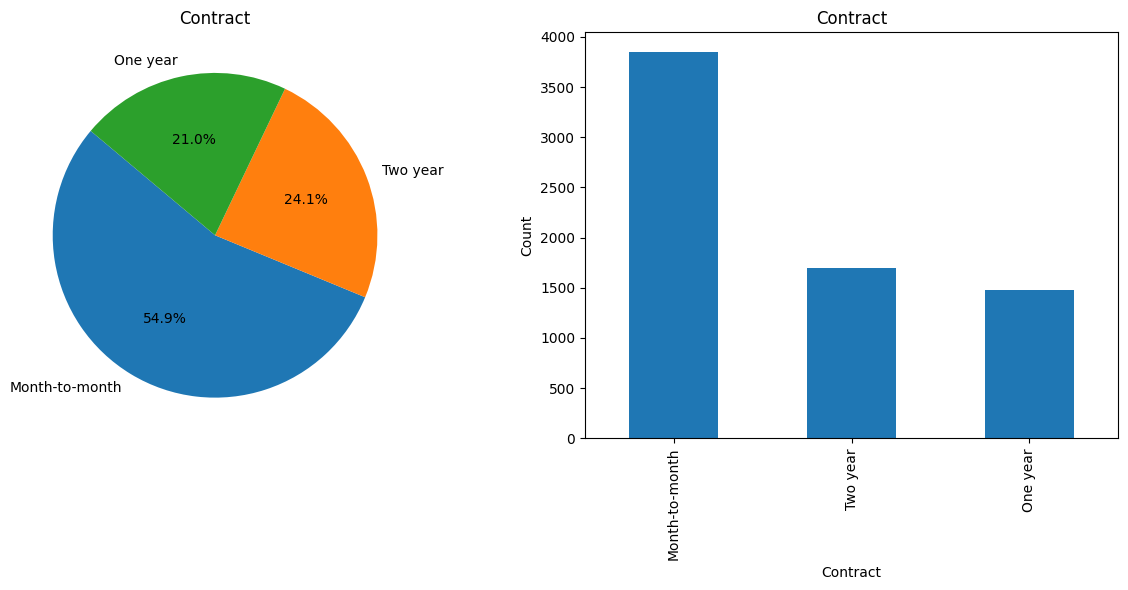

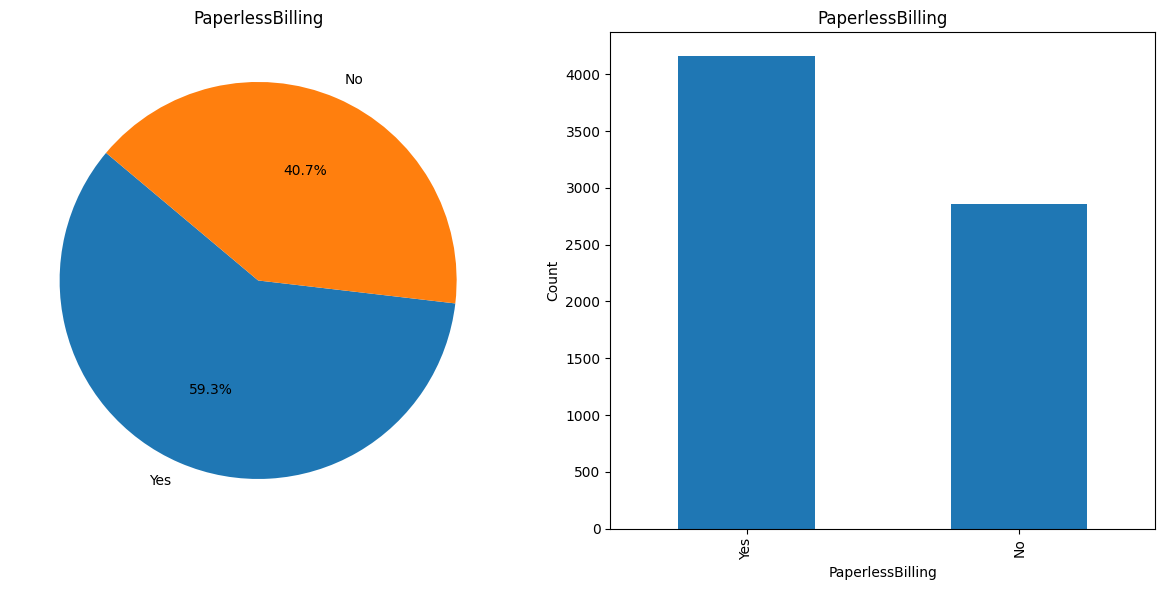

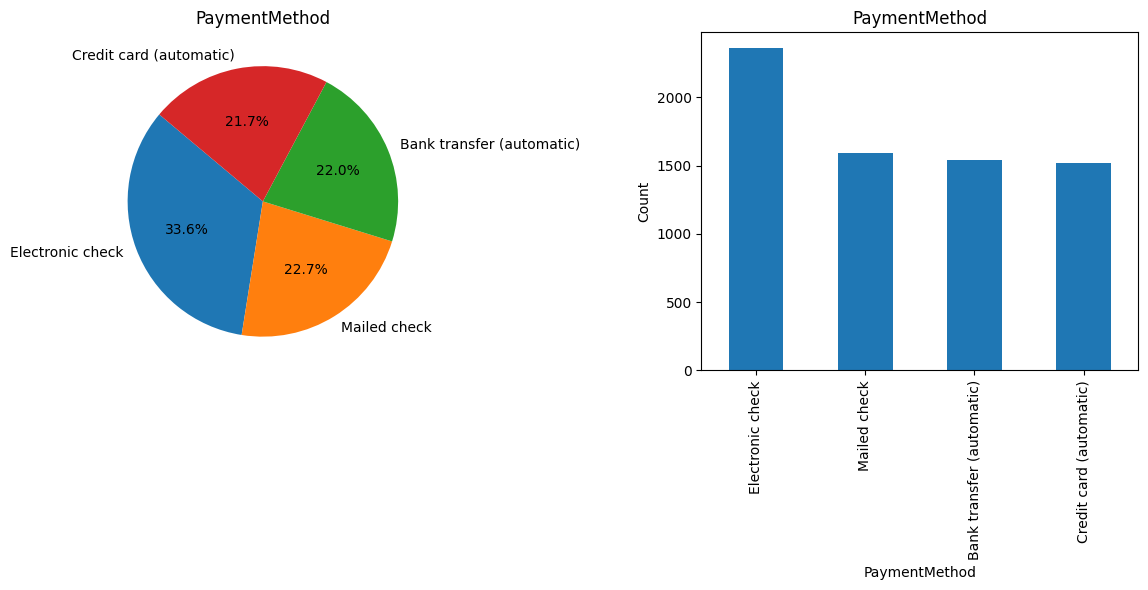

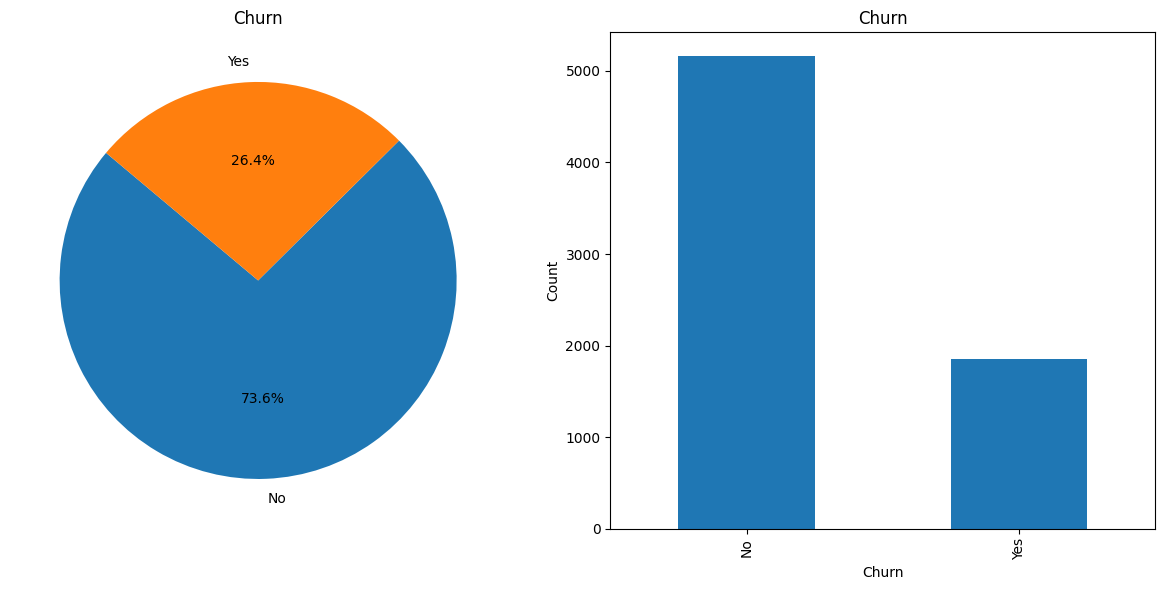

In [179]:
# draw Pie chart, Bar chart to know if the data is biased or not
for i in df_categorical_features.columns:
  counts = df_categorical_features[i].value_counts()

  # Plotting
  fig, axes = plt.subplots(1, 2, figsize=(12, 6))

  # Pie chart
  axes[0].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
  axes[0].set_title(i)

  # Bar chart
  counts.plot(kind='bar', ax=axes[1])
  axes[1].set_title(i)
  axes[1].set_ylabel('Count')
  axes[1].set_xlabel(i)

  plt.tight_layout()
  plt.show()

In [180]:
df_categorical_features.drop(columns = ["Churn"], inplace = True)

In [181]:
# as the figues proposed, the data is unbalanced. since most of the approaches that we use to solve this problem usually needs an expert in the domain, i will leave it as it is
df_encoded = pd.get_dummies(df, columns=df_categorical_features.columns)

In [182]:
# note: the columns that contains True/False are "bool" not "object", so it's acceptable by the model
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,No,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,No,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,Yes,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,No,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,Yes,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


In [183]:
# split the target column
X = df_encoded.drop(columns=['Churn'],axis=1)
y = df_encoded['Churn']

In [184]:
from sklearn.preprocessing import MinMaxScaler

In [185]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(X)

# Convert the scaled data back into a DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=X.columns)
print("\nScaled DataFrame:")
print(df_scaled)


Scaled DataFrame:
      SeniorCitizen    tenure  MonthlyCharges  TotalCharges  gender_Female  \
0               0.0  0.013889        0.115423      0.001275            1.0   
1               0.0  0.472222        0.385075      0.215867            0.0   
2               0.0  0.027778        0.354229      0.010310            0.0   
3               0.0  0.625000        0.239303      0.210241            0.0   
4               0.0  0.027778        0.521891      0.015330            1.0   
...             ...       ...             ...           ...            ...   
7016            0.0  0.333333        0.662189      0.227521            0.0   
7017            0.0  1.000000        0.845274      0.847461            1.0   
7018            0.0  0.152778        0.112935      0.037809            1.0   
7019            1.0  0.055556        0.558706      0.033210            0.0   
7020            0.0  0.916667        0.869652      0.787641            0.0   

      gender_Male  Partner_No  Partner_Yes  

In [186]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [187]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.3, random_state=42)

In [194]:
# Filling the missing values
X_train["TotalCharges"].fillna(X_train["TotalCharges"].mean(), inplace = True)
X_test["TotalCharges"].fillna(X_test["TotalCharges"].mean(), inplace = True)

In [195]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinking to prevent overfitting
    'max_depth': [3, 4, 5]  # Maximum depth of the individual trees
}

In [196]:
# Initialize the GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier()

# Initialize GridSearchCV with the parameter grid
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, error_score='raise')

In [197]:
# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=GradientBoostingClassifier(),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [198]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy of Best Model: {accuracy:.4f}")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}
Best Cross-Validation Score: 0.8059
Test Accuracy of Best Model: 0.7950
